In [1]:
# A look into FPI activity in equity from NSDL
# Data is published with an 8 month delay.

In [2]:
from pathlib import Path

import pandas as pd

In [3]:
%load_ext jupyter_black
pd.options.display.float_format = "{:.0f}".format

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


### Explore a single month of data

In [16]:
DATA_PATH = Path() / "nsdl_data" / "2025"

In [25]:
dat1 = pd.read_excel(DATA_PATH / "jan-2025.xlsx", engine="openpyxl")

In [26]:
dat1.head()

,RFDE_CUST_REG_NUM,RFDE_RPT_DT,RFDE_TXN_ID,FII,SUB_ACC,BRKER,SCRIP_NAME,ISIN,TR_DATE,TR_TYPE(*),RFDE_SE_REG_NUM,RFDE_STLD_CODE,RATE,QUANTITY,VALUE (in Rs),RFDE_INSTR_TYPE,RFDE_REASON_DLAY,RFDE_RPT_TYPE,RFDE_AMDMNT_REASON
0,IN/CUS/025,2025-01-01,184,NaN,S868343869412,B770386235885,NMDC LTD,INE584A01023,2025-01-01,7,99,REG_DL_STLD_04,0.0,7298.0,0.0,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
1,IN/CUS/022,2025-01-01,1085893,F750013435337,S1200737910842,B770386235885,Banco Products (India) Ltd.,INE213C01025,2025-01-01,7,99,REG_DL_STLD_04,0.0,930.0,0.0,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
2,IN/CUS/022,2025-01-01,1085894,F586108693778,S421851293887,B770386235885,Banco Products (India) Ltd.,INE213C01025,2025-01-01,7,99,REG_DL_STLD_04,0.0,13326.0,0.0,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
3,IN/CUS/023,2025-01-01,000063615929,F1068518164010,S1048660787178,B770386235885,BANCO PRODUCTS (INDIA) LIMITED,INE213C01025,2025-01-01,7,99,REG_DL_STLD_04,0.0,587.0,0.0,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
4,IN/CUS/023,2025-01-01,000063615927,F874962995022,S502610051852,B770386235885,BANCO PRODUCTS (INDIA) LIMITED,INE213C01025,2025-01-01,7,99,REG_DL_STLD_04,0.0,111457.0,0.0,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00


In [65]:
dat1.rename(columns={"TR_TYPE(*)": "TR_TYPE", "VALUE (in Rs)": "VALUE"}, inplace=True)

In [66]:
dat1.iloc[0].transpose()

RFDE_CUST_REG_NUM              IN/CUS/025
RFDE_RPT_DT           2025-01-01 00:00:00
RFDE_TXN_ID                           184
FII                                   NaN
SUB_ACC                     S868343869412
BRKER                       B770386235885
SCRIP_NAME                       NMDC LTD
ISIN                         INE584A01023
TR_DATE               2025-01-01 00:00:00
TR_TYPE                                 7
RFDE_SE_REG_NUM                        99
RFDE_STLD_CODE             REG_DL_STLD_04
RATE                                  0.0
QUANTITY                           7298.0
VALUE                                 0.0
RFDE_INSTR_TYPE           REG_DL_INSTR_EQ
RFDE_REASON_DLAY            REG_DL_DLAY_P
RFDE_RPT_TYPE               DL_RPT_TYPE_N
RFDE_AMDMNT_REASON       DL_AMDMNT_DEL_00
Name: 0, dtype: object

In [34]:
dat1.TR_TYPE.value_counts(ascending=False)

TR_TYPE
4     236836
1     196471
7       2772
15      1806
2        810
3         34
5         16
8         13
12        13
16        10
14         9
13         8
10         5
11         1
Name: count, dtype: int64

### Transaction type (TR_TYPE) - Frequent (top 2)
- Sale in secondary market 	04
- Purchase in secondary market 	01

In [72]:
fpi = dat1[(dat1.TR_TYPE == 1) | (dat1.TR_TYPE == 4)]

In [74]:
fpi.loc[:, "TR_DATE"] = pd.to_datetime(fpi["TR_DATE"])

In [61]:
fpi[fpi.ISIN == "INE982J01020"][:3]

,RFDE_CUST_REG_NUM,RFDE_RPT_DT,RFDE_TXN_ID,FII,SUB_ACC,BRKER,SCRIP_NAME,ISIN,TR_DATE,TR_TYPE,RFDE_SE_REG_NUM,RFDE_STLD_CODE,RATE,QUANTITY,VALUE (in Rs),RFDE_INSTR_TYPE,RFDE_REASON_DLAY,RFDE_RPT_TYPE,RFDE_AMDMNT_REASON
691,IN/CUS/023,2025-01-02,0O00004G5YIS,F1068518164010,S1048660787178,B1083872365222,ONE 97 COMMUNICATIONS LIMITED,INE982J01020,2025-01-01,1,23,REG_DL_STLD_01,989.3106,33604.0,33244793.40,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
742,IN/CUS/023,2025-01-02,0O00004G5W85,F1068518164010,S1048660787178,B1083872365222,ONE 97 COMMUNICATIONS LIMITED,INE982J01020,2025-01-01,4,1,REG_DL_STLD_01,986.2558,43.0,42409.00,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00
1051,IN/CUS/023,2025-01-02,0O00004G5WF3,F1068518164010,S1048660787178,B1083872365222,ONE 97 COMMUNICATIONS LIMITED,INE982J01020,2025-01-01,4,23,REG_DL_STLD_01,988.1672,2843.0,2809359.35,REG_DL_INSTR_EQ,REG_DL_DLAY_P,DL_RPT_TYPE_N,DL_AMDMNT_DEL_00


## ISIN maps to NSE
ISIN can be used to link to NSE if needed to obtain the stock information.
https://www.nseindia.com/get-quotes/equity?symbol=FIVESTAR  

There is `[FII, SUB_ACC, BRKER]` FII, Subaccount, and a broker associated with each data point.  
There is a potential to map this data as well.


## Initial analysis
To begin with, let's aim to summarize the purchase and sale by:
1. scrip
2. fpi
3. month/year

Build a quick shiny app for the above to be served from AWS.

In [91]:
fpi.to_csv("jan_buy_sell.csv")

In [90]:
fpi.groupby("TR_TYPE")[["VALUE"]].sum() / 10000000

,VALUE
TR_TYPE,
1,262487.82
4,338538.38


## TODO - PLOTS
1. FPI monthly buy and sell value
2. FPI by country buy and sell value (monthly)
3. Scrip level diving of purchase and sale.
4. FPI level buy and sale or net position
5. Size of FPI and net position in scrips.

In [9]:
fpi = pd.read_csv("nsdl_data/jan_buy_sell_2025.csv", index_col=0)

In [10]:
cols_keep = ["SCRIP_NAME", "ISIN", "TR_DATE", "TR_TYPE", "RATE", "QUANTITY", "VALUE"]

In [11]:
fpi = fpi[cols_keep]

In [34]:
fpi[fpi.TR_TYPE == 4].groupby(["SCRIP_NAME", "ISIN"], as_index=True).agg(
    # {
    {"VALUE": "sum", "RATE": ["min", "max"]}
    TOTAL_VALUE = pd.NamedAgg(column="VALUE", aggfunc="sum"),
    LOWEST_PRICE =pd.NamedAgg(column="RATE", aggfunc="min"),
    # WEGHTED_RATE =     
# }
).sort_values(by=("VALUE", "sum"), ascending=False).head()

VALUE RATE     
                                                              sum  min  max
SCRIP_NAME                               ISIN                              
HDFC BANK LTD INR 1                      INE040A01034 77634791262 1626 1797
AXIS BANK LIMITED INR 2                  INE238A01034 52442149927  939 1089
HDFC BANK LIMITED EQ FV01                INE040A01034 49827688658 1626 1800
ICICI BANK LIMITED INR 2                 INE090A01021 44116598042 1188 1290
AXIS BANK LIMITED EQ FV 2                INE238A01034 39146858863  937 1089

## alculating the average monthly volume of FPIs

In [1]:
import pyarrow.parquet as pq

In [9]:
df1 = pq.read_table("fpi_data/fpi_2024_2025.parquet")

In [10]:
dfp = df1.to_pandas()

In [11]:
dfp.shape

(5908077, 13)

In [12]:
dfp = dfp[(dfp.TR_TYPE == 4) | (dfp.TR_TYPE == 1)]

In [13]:
dfp.head()

,SCRIP_NAME,ISIN,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type
11,GUJARAT INDUSTRIES P,INE162A01010,2024-02-01,4,222.7558,5000.0,1.113779e+06,feb,2024,0,0.111378,Gujarat Industries Power Company Limited,Equity
12,ADANI TOTAL GAS LIMI,INE399L01023,2024-02-01,1,1009.0338,950000.0,9.585821e+08,feb,2024,0,95.858211,Adani Total Gas Limited,Equity
13,RESPONSIVE INDUSTRIE,INE688D01026,2024-02-01,1,299.7814,4000.0,1.199126e+06,feb,2024,0,0.119913,Responsive Industries Limited,Equity
14,RESPONSIVE INDUSTRIE,INE688D01026,2024-02-01,1,299.3705,22408.0,6.708294e+06,feb,2024,0,0.670829,Responsive Industries Limited,Equity
15,RESPONSIVE INDUSTRIE,INE688D01026,2024-02-01,4,300.9500,4000.0,1.203800e+06,feb,2024,0,0.120380,Responsive Industries Limited,Equity


In [14]:
dfp.shape

(5841568, 13)

In [ ]:
dfp1_4 = dfp[(dfp.TR_TYPE == 4) | (dfp.TR_TYPE == 1)]

In [9]:
(
    dfp1_4.groupby(["month", "year", "TR_TYPE"])["QUANTITY"].sum() / 10000000
).reset_index()["QUANTITY"].mean()

np.float64(716.6711378341)

In [15]:
(
    dfp1_4[dfp1_4["year"] == 2024].pivot_table(
        index=["month", "year"],
        columns=["TR_TYPE"],
        values=["QUANTITY"],
        aggfunc="sum",
    )
    / 10000000
)

QUANTITY             
TR_TYPE              1            4
month year                         
apr   2024  866.226858   798.108041
aug   2024  987.912810  1035.010921
dec   2024  505.468094   554.735808
feb   2024  844.195422   815.491761
jan   2024  664.295956   703.615247
jul   2024  712.413343   693.121568
jun   2024  921.244076   798.978711
mar   2024  695.748968   596.767983
may   2024  859.784389   877.654533
nov   2024  478.867108   679.119795
oct   2024  558.497528   793.764521
sep   2024  823.008980   758.259924

volume: 743,13,86,277 of shares bought by FPIs on average each month.

In [19]:
(
    dfp1_4.pivot_table(
        index=["year"],# "month"],
        columns=["TR_TYPE"],
        values=["QUANTITY"],
        aggfunc="sum",
    )
    / 10000000 #crores
)

QUANTITY             
TR_TYPE            1            4
year                             
2024     8917.663532  9104.628814
2025     1650.809584  1827.032205

In [11]:
(
    dfp1_4[dfp1_4["year"] == 2024].pivot_table(
        index=["year"],
        columns=["TR_TYPE"],
        values=["value_crores"],
        aggfunc="sum",
    )
    # / 10000000
).reset_index()["value_crores"].mean()

TR_TYPE
1    4.178718e+06
4    4.296630e+06
dtype: float64

In [34]:
dfp.columns

Index(['SCRIP_NAME', 'ISIN', 'TR_DATE', 'TR_TYPE', 'RATE', 'QUANTITY', 'VALUE',
       'month', 'year', 'mutual_fund', 'value_crores', 'company_name',
       'instrument_type'],
      dtype='object')

## NSE total traded quantity calculations

https://www.nseindia.com/market-data/business-growth-cm-segment

In [40]:
total_qty_traded = 10427995 * 100000

In [43]:
fpi_bough_sold_shares = 180222923458

In [44]:
fpi_bough_sold_shares / total_qty_traded

0.17282605472864151

In [46]:
fpi_bough_sold_shares / 10000000

18022.2923458

## additional analysis using FII id data

In [9]:
import pandas as pd
import pyarrow.parquet as pq

In [10]:
dt1 = pq.read_table("fpi_data/fpi_id_2024_2025_mgd_jan2026.parquet").to_pandas()

In [11]:
dt1 = dt1[(dt1.TR_TYPE == 4) | (dt1.TR_TYPE == 1)]

In [12]:
dt1.FII.unique()

array(['F361420591500', None, 'F577817169357', ..., 'F960037035661',
       'F1052569156393', 'F598426607826'], shape=(33014,), dtype=object)

In [13]:
dt1[dt1.mutual_fund == 0].tail(20)

,SCRIP_NAME,ISIN,FII,SUB_ACC,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type
5908006,ADITYA BIRLA FASHION N RETAIL EQ 10,INE647O01011,None,S535219383756,2025-03-28,1,256,10000,2563109,mar,2025,0,0,Aditya Birla Fashion and Retail Limited,Equity
5908007,INDIAN OVERSEAS BANK ORD EQ FV10,INE565A01014,None,S1024003831523,2025-03-28,1,0,1725412,0,mar,2025,0,0,Indian Overseas Bank,Equity
5908008,SYSTEMATIX CORP LTD SPLIT EQ FV10,INE356B01024,None,None,2025-03-28,1,140,10000,1400000,mar,2025,0,0,None,None
5908010,DESCO INFRATECH EQ FV10,INE0TGG01014,None,S1078882893452,2025-03-28,1,150,176000,26400000,mar,2025,0,3,None,None
5908011,BANK OF BARODA EQ FV 2,INE028A01039,None,None,2025-03-27,1,0,32175,0,mar,2025,0,0,Bank Of Baroda,Equity
5908013,SAMMAAN CAPITAL LTD EQ FV 2,INE148I01020,None,None,2025-03-28,1,108,17411,1871975,mar,2025,0,0,Sammaan Capital Limited,Equity
5908014,IOB EQ LSTNG TRD APP AWT,IN8565A01013,None,None,2025-03-28,4,0,2464875,0,mar,2025,0,0,None,None
5908015,SBI CARDS N PAYMENT SR LTD EQ FV10,INE018E01016,None,None,2025-03-28,1,883,167,147437,mar,2025,0,0,Sbi Cards And Payment Services Limited,Equity
5908017,MAHINDRA AND MAH EQ FV 5,INE101A01026,F514548180004,S565005449005,2025-03-28,4,2658,4427,11766227,mar,2025,0,1,Mahindra & Mahindra Limited,Equity
5908018,PUNJAB AND SIND TRD APRL AWAT FV10,IN8608A01011,None,S1078882893452,2025-03-28,1,38,1824341,69999964,mar,2025,0,7,None,None


,SCRIP_NAME,ISIN,FII,SUB_ACC,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type
97669,INTELLIVATE CAPITAL VENTURES EQ 2,IN8512D01019,F952611593286,S647155222887,2024-02-08,1,0.0,50225.0,0.0,feb,2024,0,0.0,None,None
97678,INTELLIVATE CAPITAL VENT EQ FV 1,INE512D13015,F952611593286,S647155222887,2024-02-08,4,0.0,50225.0,0.0,feb,2024,0,0.0,None,None
223017,INDIABULLS HOUS FIN RGHTS EQ FV2,INE148I20012,F952611593286,S647155222887,2024-02-20,4,0.0,3000.0,0.0,feb,2024,0,0.0,None,None
244875,INTELLIVATE CAPITAL EQ FV1,INE512D01028,F952611593286,S647155222887,2024-02-21,1,0.0,50225.0,0.0,feb,2024,0,0.0,None,None
244877,INTELLIVATE CAPITAL VENTURES EQ 2,IN8512D01019,F952611593286,S647155222887,2024-02-21,4,0.0,50225.0,0.0,feb,2024,0,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907987,AXIS BANK LTD EQ FV 2,INE238A01034,None,None,2025-03-27,1,0.0,3750.0,0.0,mar,2025,0,0.0,Axis Bank Limited,Equity
5908007,INDIAN OVERSEAS BANK ORD EQ FV10,INE565A01014,None,S1024003831523,2025-03-28,1,0.0,1725412.0,0.0,mar,2025,0,0.0,Indian Overseas Bank,Equity
5908011,BANK OF BARODA EQ FV 2,INE028A01039,None,None,2025-03-27,1,0.0,32175.0,0.0,mar,2025,0,0.0,Bank Of Baroda,Equity
5908014,IOB EQ LSTNG TRD APP AWT,IN8565A01013,None,None,2025-03-28,4,0.0,2464875.0,0.0,mar,2025,0,0.0,None,None


> There are 1575 rows with 0 values. data reporting issues. In these cases, it is either the price or quantity is zero.

In [11]:
dt1 = dt1[dt1.VALUE!=0]

> There are many blanks FII IDs (there is a sub account number). I'd like to these records even if it will severely underestimate the count of FII trading on a given stock of interest.

In [75]:
# this is the value of records without a FII
dt1[dt1["FII"].isna()]["VALUE"].sum()

np.float64(20118047148118.8)

In [76]:
# this is the value of records without a SUB_ACC
dt1[dt1["SUB_ACC"].isna()]["VALUE"].sum()

np.float64(8876022630149.97)

In [77]:
# this is % of total value accounted by records without SUBACC ID
(dt1[dt1["SUB_ACC"].isna()]["VALUE"].sum()) / (dt1["VALUE"].sum())

np.float64(0.08624919727745052)

In [78]:
# this is % of total value accounted by records without FII ID
(dt1[dt1["FII"].isna()]["VALUE"].sum()) / (dt1["VALUE"].sum())

np.float64(0.19548907090673243)

In [79]:
# this is % of total value accounted by records with FII
(dt1[(dt1["FII"].isna()) & (dt1["SUB_ACC"].isna())]["VALUE"].sum()) / (
    dt1["VALUE"].sum()
)

np.float64(0.08111166679279104)

In [80]:
# which stocks are most impacted by missing values in FII and Sub_ACC
dt1[(dt1["FII"].isna()) & (dt1["SUB_ACC"].isna()) & (dt1["mutual_fund"] == 0)].groupby(
    "ISIN"
).count()

,SCRIP_NAME,FII,SUB_ACC,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type
ISIN,,,,,,,,,,,,,,
IN0020210244,1,0,0,1,1,1,1,1,1,1,1,1,1,1
IN800LO01018,1,0,0,1,1,1,1,1,1,1,1,1,0,0
IN8024L01018,1,0,0,1,1,1,1,1,1,1,1,1,0,0
IN80F3301011,1,0,0,1,1,1,1,1,1,1,1,1,0,0
IN8160A01021,2,0,0,2,2,2,2,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INE998U01015,12,0,0,12,12,12,12,12,12,12,12,12,12,12
INE999A01015,146,0,0,146,146,146,146,146,146,146,146,146,0,0
INE999A01023,436,0,0,436,436,436,436,436,436,436,436,436,436,436


In [82]:
# check the distribution of the 3 digit in the ISIN - indicates govt, state, DVR

dt1[dt1.ISIN.str.contains("^IN[0-9]", regex=True)]["ISIN"].apply(
    lambda x: x[2]
).value_counts()

ISIN
9    7530
8      93
0       1
Name: count, dtype: int64

In [41]:
dt1[~dt1['FII'].isna()].groupby('year')['FII'].unique().apply(lambda x: len(x))

year
2024    26571
2025     6442
Name: FII, dtype: int64

## what more?

what can I do here? the fii ids can be used. Perhaps build a model straight out and not waste any more time on this summarization.

predict FII activity? 
is there clustering of FII activity in stocks? if one FII sells is it followed more selling by FIIs. There is possibly a mix of stories here .

In [86]:
months_order = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]

In [87]:
dt1["month"] = pd.Categorical(dt1["month"], categories=months_order, ordered=True)

In [97]:
dt1[dt1.ISIN == 'INE585B01010'].pivot_table(
        index=[ "year"],
        columns=["TR_TYPE"],
        values=["value_crores"],
        aggfunc="sum",
    observed=False
    )

value_crores              
TR_TYPE             1             4
year                               
2024     32305.922242  50009.234391
2025      5866.459041   7756.831780

In [94]:
dt1[dt1.ISIN == 'INF205K011T7'].pivot_table(
        index=[ "year"],
        columns=["TR_TYPE"],
        values=["value_crores"],
        aggfunc="sum",
    observed=False
    ).diff(axis=1)["value_crores"] #.sort_values() #iloc[0]  #.values[:,1]

TR_TYPE,1
year,
2025,NaN


### number of FIIs in a stock

In [14]:
def fii_count_stock(ISIN_NO):
    dt_isin = dt1[dt1["ISIN"] == ISIN_NO]
    dt_isin = dt_isin.drop_duplicates(["month", "year", "FII"])
    dt_isin = (
        (
            dt_isin.groupby(["month", "year", "TR_TYPE"], observed=False)["FII"]
            .count()
            .reset_index()
        )
        .pivot_table(
            columns="TR_TYPE", index=["month", "year"], values="FII", observed=False
        )
        .reset_index()
        .sort_values(by=["year", "month"])
    )
    return dt_isin

In [15]:
dt = fii_count_stock("INE238A01034")

In [16]:
dt.rename(columns={1: "Buy", 4: "Sell"})

TR_TYPE,month,year,Buy,Sell
0,apr,2024,215,289
1,aug,2024,201,273
2,dec,2024,176,248
3,feb,2024,241,273
5,jan,2024,233,265
7,jul,2024,241,294
8,jun,2024,271,214
9,mar,2024,194,289
11,may,2024,240,259
12,nov,2024,174,265


## for a single stock and single FII let's look at the sell or buy pattern over the course of the data period

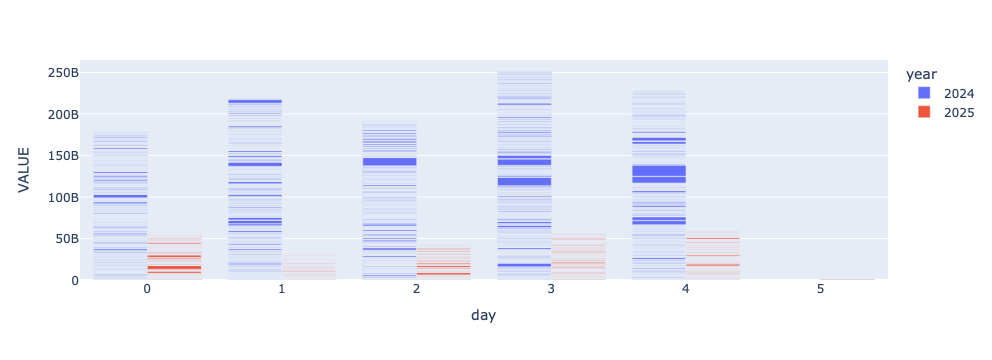

In [54]:
# INE238A01034
import plotly.express as px

dat1 = dt1[
    (dt1["ISIN"] == "INE238A01034") & (dt1["TR_TYPE"] == 4)
][  # & (dt1["FII"] == "F1068419163911")][
    ["VALUE", "TR_DATE", "year"]
]
dat1["day"] = pd.to_datetime(dat1["TR_DATE"]).dt.weekday
px.bar(dat1, x="day", y="VALUE", color="year", barmode="group")

In [47]:
dat1.groupby("day").sum("VALUE")

,VALUE
day,
0,236228546080
1,250275932033
2,234307914060
3,307633888491
4,286389993528
5,525090554


In [48]:
dat1

,VALUE,TR_DATE,day
221,42155,2024-02-01,3
661,431201,2024-02-01,3
1514,21455606,2024-02-01,3
1942,95374833,2024-02-01,3
2176,56374351,2024-02-01,3
...,...,...,...
5904999,17285565,2025-03-28,4
5905601,12322998,2025-03-28,4
5905882,18550455,2025-03-28,4
5906259,32851798,2025-03-28,4


In [38]:
dt1[["month", "year"]]

,month,year
11,feb,2024
12,feb,2024
13,feb,2024
14,feb,2024
15,feb,2024
...,...,...
5908072,mar,2025
5908073,mar,2025
5908074,mar,2025
5908075,mar,2025


## some good text for linkedIn to show off

2025 saw major selling by the FPIs in Indian capital markets. They (net) sold something to the tune of 1.6 lac crores. The selling which started in Jan continued unabated, peaking in September, completely ignoring the GST break and the demand boost it made probable. Despite the aggressive selling the markets remained steady. DIIs and others stepped up the buying with strong faith in the indian growth story. Intrigued by these events, I started looking into the FPI buying data. NSDL has a rich dataset on the daily FPI transactions (going back to 2018s) but unfortunately released with an enormous delay (the latest is from March 2025). Still an interesting cache for exploration. I extracted, cleaned, and built an app in Python Shiny around this data for exploration. No major insights yet to share (still working) but students and others interested in viewing this data can find some meaning here. The app is here.

Note specific FPIs cannot be identified if you are interested to see longitudinal patterns or hope to link the FPIs to their country of origin with FPI registration data as the IDs are masked and they change every month. 

Connecting this data with the NSE stock level data from ICICI Breeze API or similar source, I can look into the response of prices to the FPI selling and other such questions.

## FPI concentration in sales of purchases of a given stock!

HHF is a measure of industry concentration used in IO. If a market is dominated by a few players, the HHF will be a large number and if there are many players (and no few dominant ones) then the HHF index will be small. 

Applying this principle to FPI activity in stocks will help understand if the buying/selling is broadbased (across all FPIs) or is concentrated (just a few of them with large portions). 

The way I'm mapping this to stock activity is perhaps naive as I'm ignoring the relative proportion of this stock in the portfolio of each FPIs, etc. Accounting for this would provide a better sentiment driving the action of the FPI. 

The way to operationalize is take a single stock, in a given time period, where many different FPIs trade this stock. Take  proportion of sales in this stock by each active FPIs and use this to arrive at a concentration index. 

$S_{fs}=\sum_{f} TV_{sf}/TV_{s}$ 

$S_{fs}$ = Share of FPI, $f$, in the total volume (selling/buying) of stock, $s$  
$TV_{s}$ = total volume {sold,bought} of stock, $s$  
$TV_{sf}$ = total quantity {sold,bought} by FPI, $f$, of stock, $s$ 

Thus, the $hhf_{s}$ : concentration of FPI selling or buying in stock $s$ 

$hhf_{s} = \sum_{f} (S_{fs})^2$

The total volume, concentration, etc. is calculated for a fixed duration - {day, week, or month.}




In [55]:
## stocks with most number of FPIs active

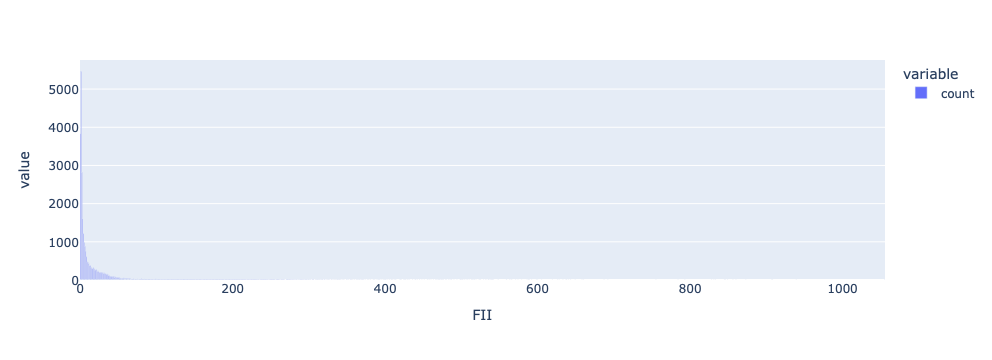

In [70]:
px.bar(
    dt1.drop_duplicates(["FII", "ISIN", "month", "year"])
    .groupby(["ISIN", "month", "year"])
    .count()["FII"]
    .reset_index()["FII"]
    .value_counts()
)

let's calculate the hhf index for a stock

In [ ]:
def hhf_stock(compan

In [75]:
def hhf_stock(company_name):
    dt1 = (
        dt1[(dt1["company_name"] == company_name)]
        .groupby(["company_name", "month", "year", "FII"])
        .transform(sum("VALUE")
        .reset_index()
    ) # this is one dataset
    dtt['total_stock_volume']=
    return dtt

In [164]:
dt1["volume_FII_month_year"] = dt1.groupby(["company_name", "month", "year", "FII"])[
    "VALUE"
].transform("sum")

dt1["volume_total_month_year"] = dt1.groupby(["company_name", "month", "year"])[
    "VALUE"
].transform("sum")

dt1["squared_monthly_fii_share"] = (
    ((dt1["volume_FII_month_year"] / dt1["volume_total_month_year"]) * 100) ** 2
).astype("float")

In [165]:
dt1.loc[:, dt1.columns.str.contains("volume|squared")][:11]

,volume_FII_month_year,volume_total_month_year,squared_monthly_fii_share
11,1113779,268475406,0
12,NaN,38538751658,NaN
13,NaN,324099831,NaN
14,NaN,324099831,NaN
15,NaN,324099831,NaN
16,NaN,324099831,NaN
17,20600840,175330922,138
18,NaN,38609764,NaN
19,NaN,118297380,NaN
20,NaN,NaN,NaN


In [153]:
dt1[dt1["ISIN"] == "INE999A01015"]["monthly_fii_share"]

354       NaN
1087      NaN
2573      NaN
2825      NaN
3033      NaN
           ..
4496452   NaN
4496489   NaN
4500024   NaN
4501151   NaN
4502533   NaN
Name: monthly_fii_share, Length: 2069, dtype: float64

In [143]:
def hhf_stock1(company_name):
    return (
        dt1[(dt1["ISIN"] == company_name)]
        .groupby(["month", "year"])["squared_monthly_fii_share"]
        .sum()
    )

In [144]:
hhf_stock1("INE999A01015")

month  year
apr    2024   0
feb    2024   0
jan    2024   0
jul    2024   0
jun    2024   0
mar    2024   0
may    2024   0
Name: squared_monthly_fii_share, dtype: float64

In [122]:
dt1[dt1["volume_total_month_year"] == 268475406]

,SCRIP_NAME,ISIN,FII,SUB_ACC,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type,volume_FII_month_year,volume_total_month_year,monthly_fii_share,squared_monthly_fii_share


In [124]:
dt1["volume_total_month_year"]

11          268475406
12        38538751658
13          324099831
14          324099831
15          324099831
              ...    
5908072           NaN
5908073           NaN
5908074           NaN
5908075           NaN
5908076           NaN
Name: volume_total_month_year, Length: 5841568, dtype: float64

In [166]:
new_data = (
    dt1.groupby(["company_name", "month", "year"])["squared_monthly_fii_share"]
    .sum()
    .reset_index()
)

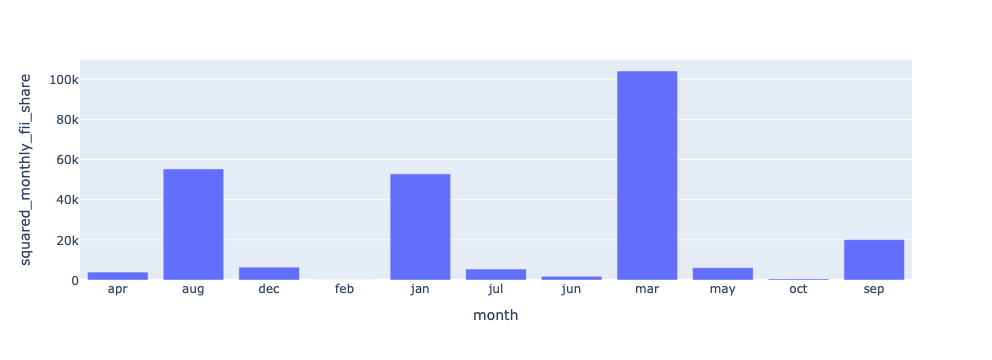

In [172]:
px.bar(
    new_data[
        (new_data["company_name"] == "20 Microns Limited")
        & (new_data["year"] == "2024")
    ],
    x="month",
    y="squared_monthly_fii_share",
)

In [177]:
microns_m_24 = dt1[
    (dt1["company_name"] == "20 Microns Limited")
    & (dt1["year"] == "2024")
    & (dt1["month"] == "mar")
]

In [189]:
microns_m_24[microns_m_24["TR_DATE"] == "2024-03-05"]

,SCRIP_NAME,ISIN,FII,SUB_ACC,TR_DATE,TR_TYPE,RATE,QUANTITY,VALUE,month,year,mutual_fund,value_crores,company_name,instrument_type,volume_FII_month_year,volume_total_month_year,monthly_fii_share,squared_monthly_fii_share


In [190]:
microns_m_24.TR_DATE

2675519    2024-03-04
2683656    2024-03-05
2685505    2024-03-05
2711602    2024-03-06
2713244    2024-03-06
2713653    2024-03-06
2729702    2024-03-07
2739722    2024-03-11
2762672    2024-03-12
2762728    2024-03-12
2791560    2024-03-13
2798618    2024-03-14
2802097    2024-03-14
2849182    2024-03-18
2864042    2024-03-19
2889389    2024-03-20
2906878    2024-03-21
2917463    2024-03-22
2932867    2024-03-26
2957171    2024-03-27
2979594    2024-03-28
2982024    2024-03-28
2982546    2024-03-28
2984004    2024-03-28
Name: TR_DATE, dtype: object